In [1]:
import pandas as pd
from helper_functions import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

c:\Users\sophi\Miniconda3\envs\MT\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
occ_list = pd.read_csv('data_new/occupations_subset.csv').to_numpy().flatten()
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']

### Categorical Data Evaluation
1. Count four classifications for each occupation -> confusion matrix
2. calculate measures per occupation
3. calculate measures in total

Confusion matrix 2x2:
|      | he | she |
|------|------|--------|
|he  |      |        |
|she |      |        |

Confusion matrix 3x3:

|      | he | she | they |
|------|------|--------|-------|
|he  |      |        |       |
|she|      |        |       |
|they |      |        |       |

In [3]:
print(occ_list)

['nurse' 'fashion_designer' 'dancer' 'footballer' 'industrialist' 'boxer'
 'singer']


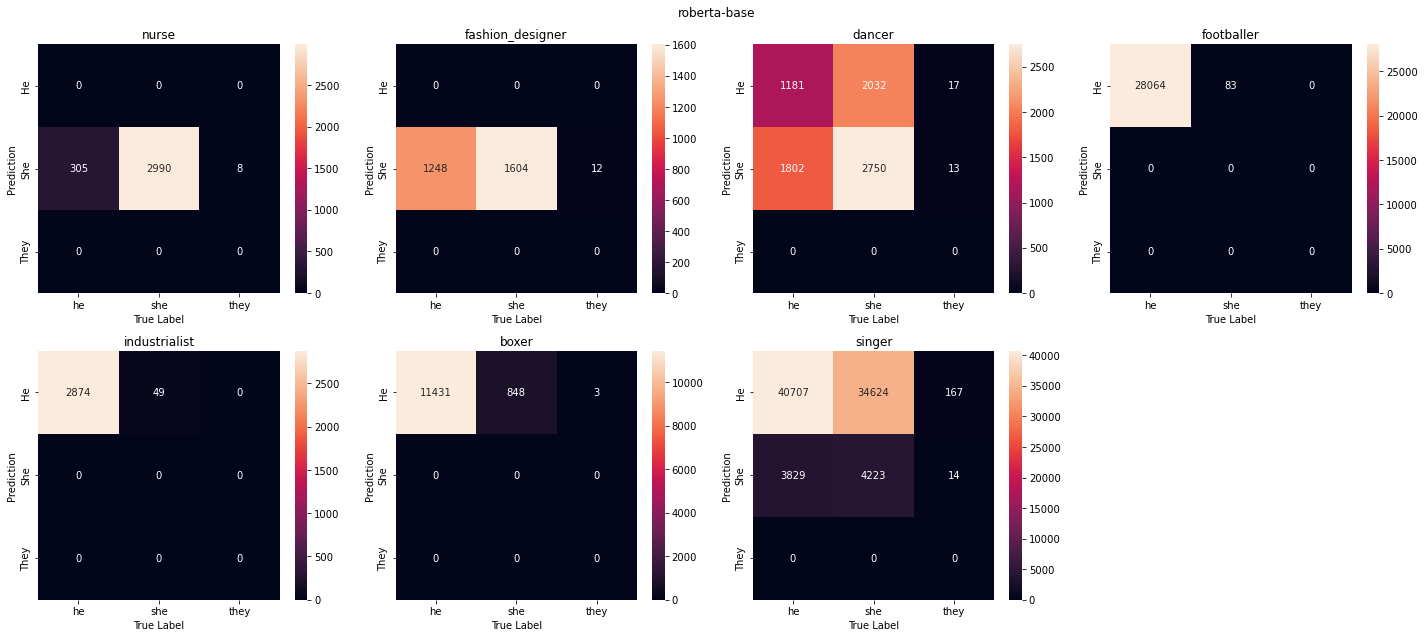

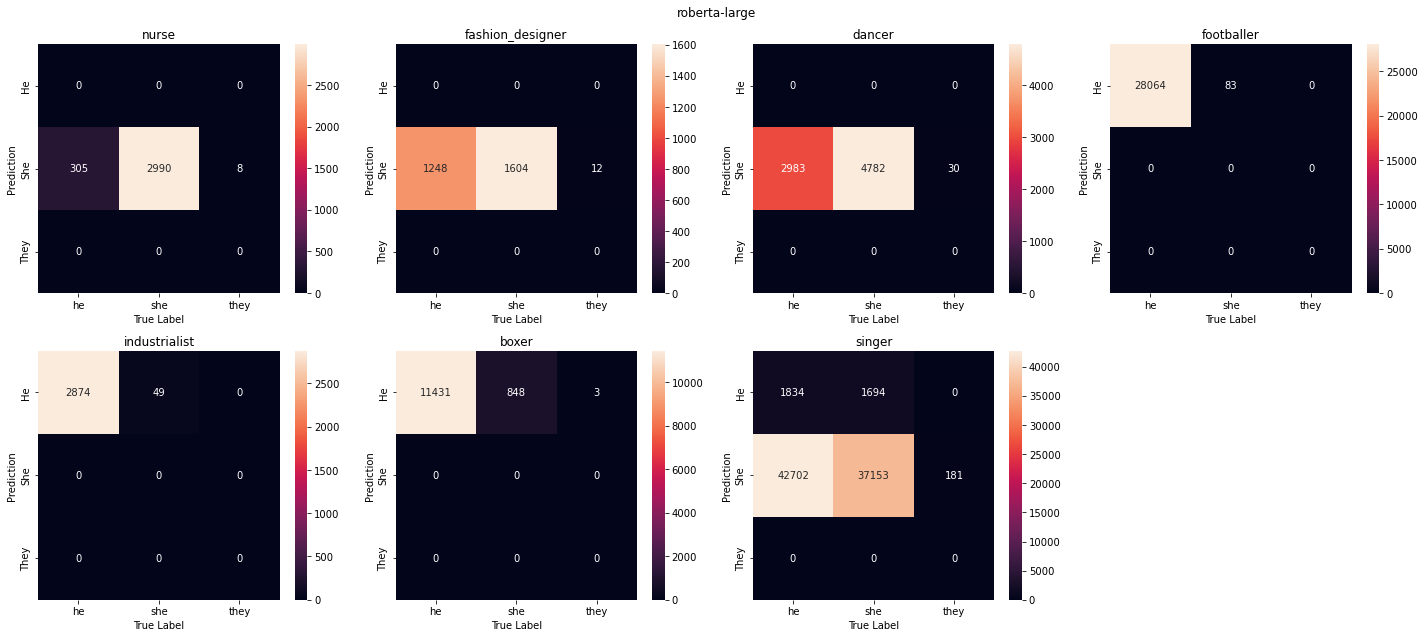

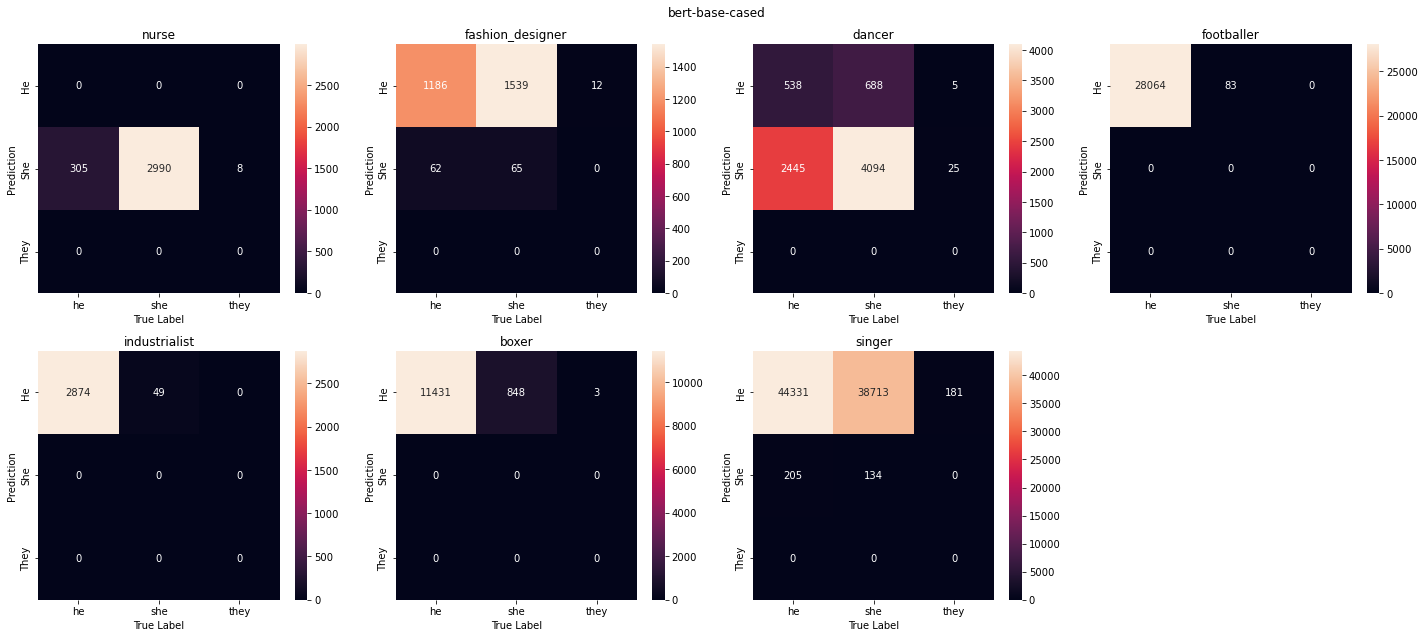

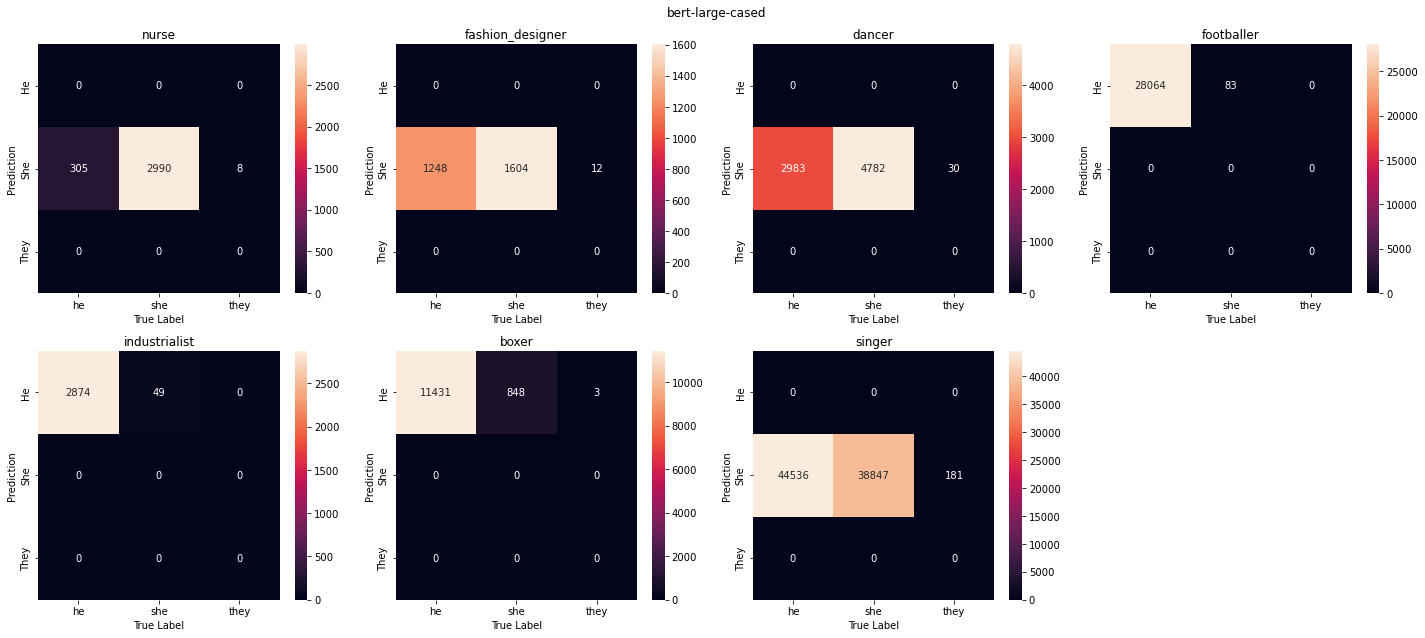

In [4]:
for model in models:
    matrices = get_matrix_subset(model, occ_list)
    fig = plt.figure(figsize=(20,9))
    fig.suptitle(model)
    for i, occ in enumerate(occ_list):
        ax = fig.add_subplot(2, 4, i+1)
        ax.title.set_text(occ)
        graph = sns.heatmap(matrices[occ].astype('int64'), ax=ax, annot=True, fmt='d', cbar=False)
        graph.set_xlabel("True Label")
        graph.set_ylabel("Prediction")
    fig.tight_layout()
    plt.savefig('figures/' + model + 'confusion_matrices_3x3.pdf')

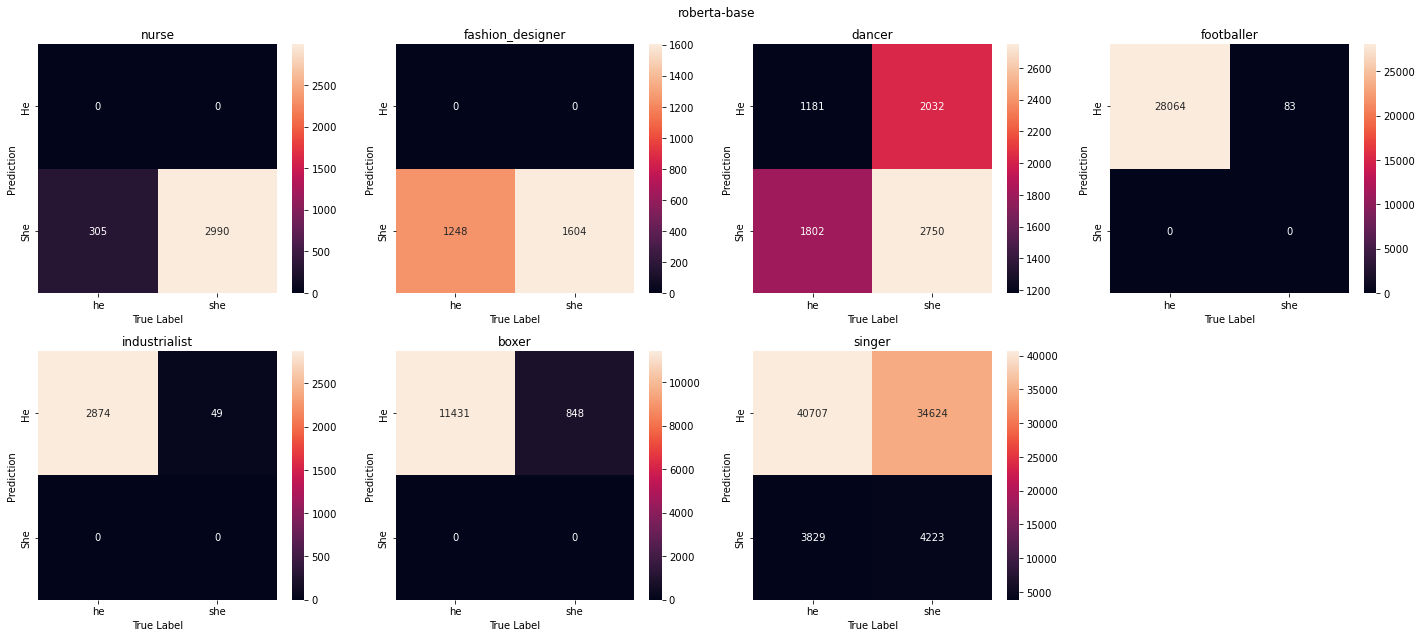

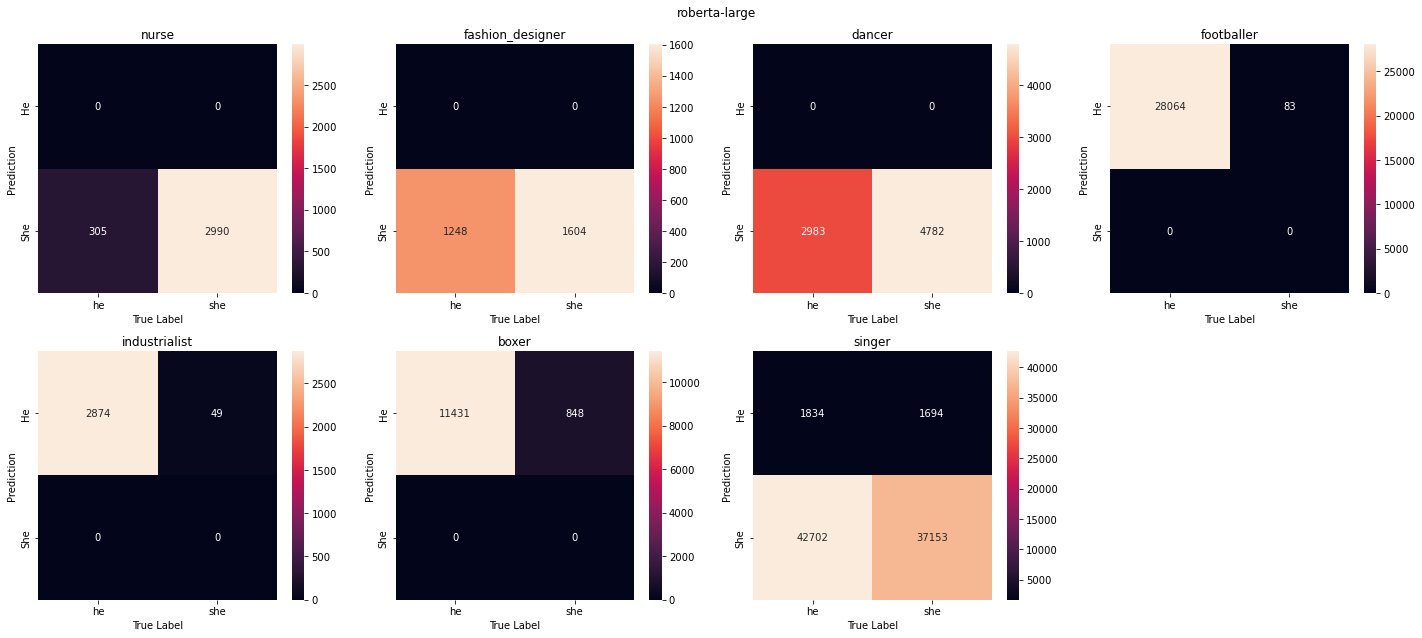

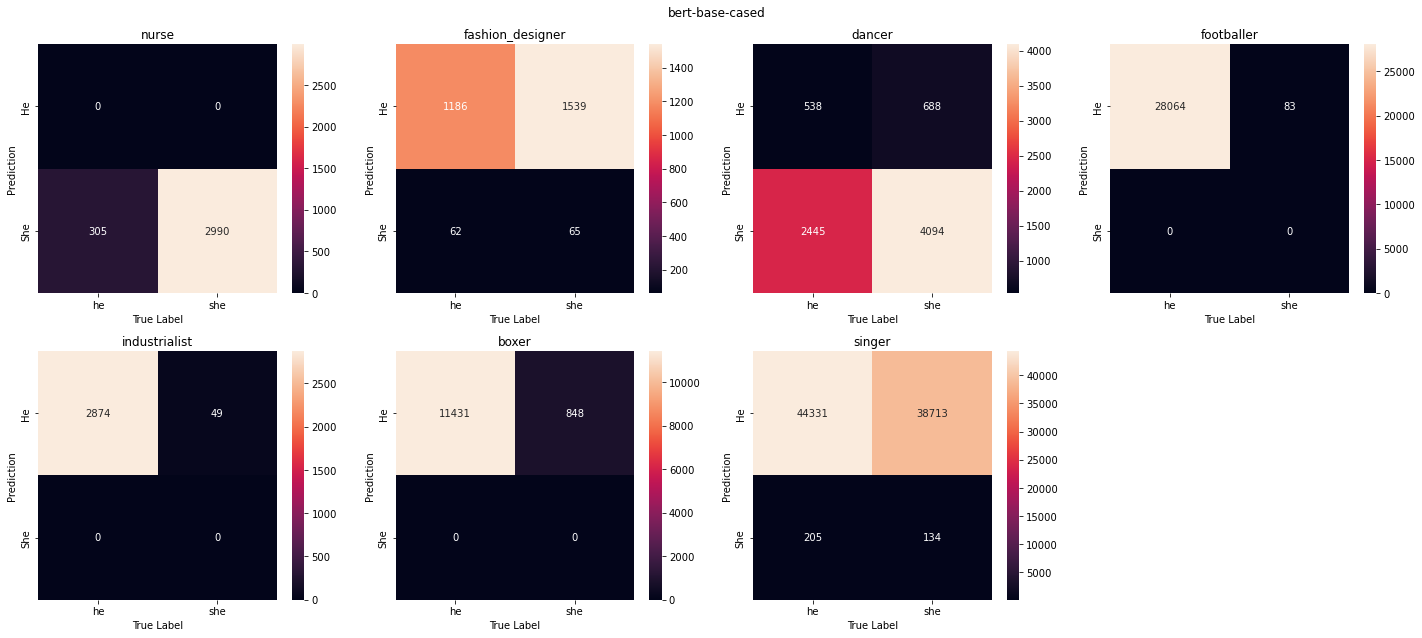

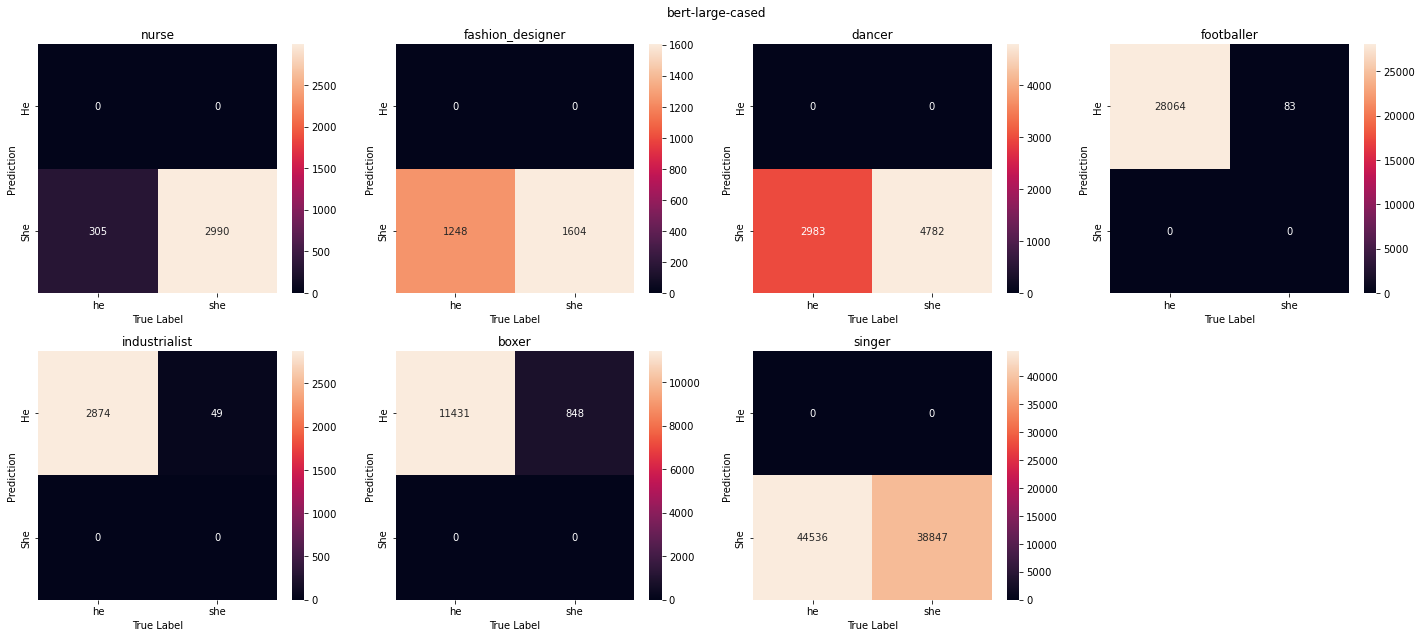

In [5]:
for model in models:
    matrices = get_matrix_subset(model, occ_list)
    fig = plt.figure(figsize=(20, 9))
    fig.suptitle(model)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i, occ in enumerate(occ_list):
        ax = fig.add_subplot(2, 4, i+1)
        ax.title.set_text(occ)
        matrix = matrices[occ]
        matrix = matrix.drop('they', axis=1)
        matrix = matrix.drop('They', axis=0)
        graph = sns.heatmap(matrix.astype('int64'), ax=ax, annot=True, fmt='d', cbar=False)
        graph.set_xlabel("True Label")
        graph.set_ylabel("Prediction")
    fig.tight_layout()
    plt.savefig('figures/' + model + 'confusion_matrices_2x2.pdf')

### Visualize in one big CM table

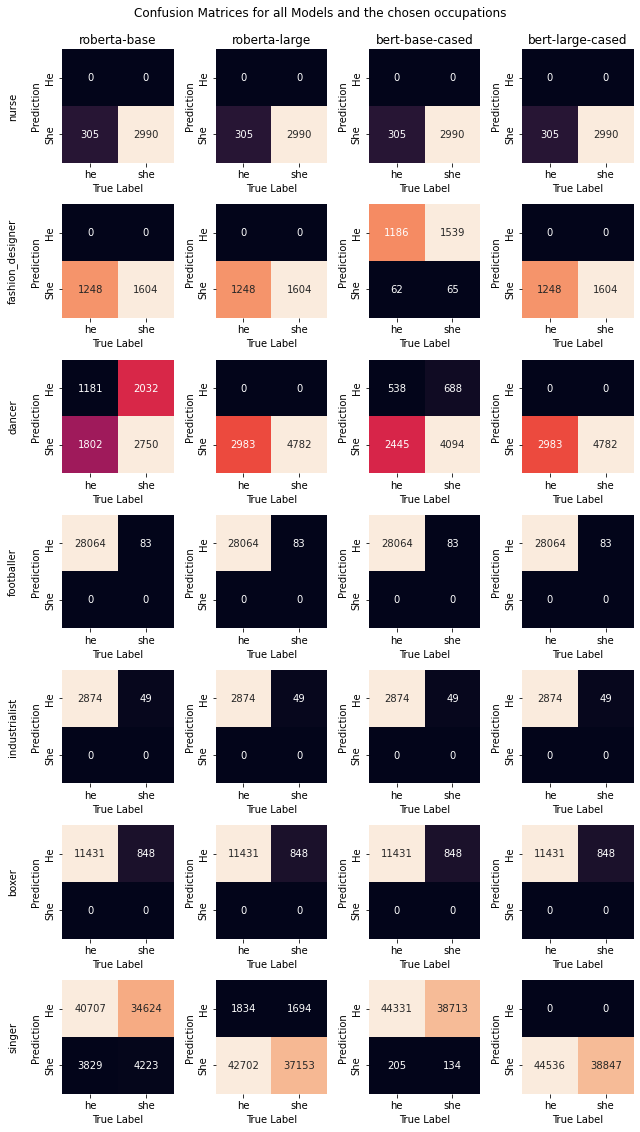

In [28]:
fig = plt.figure(figsize=(9, 16))
fig.suptitle("Confusion Matrices for all Models and the chosen occupations\n")
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for m, model in enumerate(models):
    matrices = get_matrix_subset(model, occ_list)
    for i, occ in enumerate(occ_list):
        ax = fig.add_subplot(7, 4, (m+1) + (i * 4))
        if i == 0:
            ax.title.set_text(model)
        matrix = matrices[occ]
        matrix = matrix.drop('they', axis=1)
        matrix = matrix.drop('They', axis=0)
        graph = sns.heatmap(matrix.astype('int64'), ax=ax, annot=True, fmt='d', cbar=False)
        graph.set_xlabel("True Label")
        if m == 0:
            graph.set_ylabel(occ + "\n\nPrediction")
        else:
            graph.set_ylabel("Prediction")
    #plt.savefig('figures/' + model + 'confusion_matrices_2x2.pdf')
fig.tight_layout()
plt.show()